In [1]:
import numbers
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize
from numpy import interp
from sklearn import metrics
from itertools import cycle

Before = 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
After = 
 [[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 

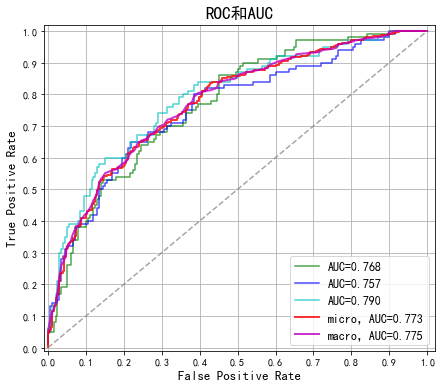

In [2]:
if __name__ == '__main__':
    np.random.seed(0)
    pd.set_option('display.width', 300)
    np.set_printoptions(suppress=True, linewidth=200)
    n = 300
    x = np.random.randn(n, 50)
    y = np.array([0]*100+[1]*100+[2]*100)
    n_class = 3
    print('Before = \n', y)

    clf = LogisticRegression(penalty='l2', C=1)
    clf.fit(x, y)
    y_score = clf.decision_function(x)
    y = label_binarize(y, classes=np.arange(n_class))
    print('After = \n', y)
    colors = cycle('gbc')
    fpr = dict()
    tpr = dict()
    auc = np.empty(n_class+2)
    mpl.rcParams['font.sans-serif'] = 'SimHei'
    mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(figsize=(7, 6), facecolor='w')
    for i, color in zip(np.arange(n_class), colors):
        fpr[i], tpr[i], thresholds = metrics.roc_curve(y[:, i], y_score[:, i])
        auc[i] = metrics.auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], c=color, lw=1.5, alpha=0.7, label='AUC=%.3f' % auc[i])
    # micro
    fpr['micro'], tpr['micro'], thresholds = metrics.roc_curve(y.ravel(), y_score.ravel())
    auc[n_class] = metrics.auc(fpr['micro'], tpr['micro'])
    plt.plot(fpr['micro'], tpr['micro'], c='r', lw=2, ls='-', alpha=0.8, label='micro，AUC=%.3f' % auc[n_class])
    # macro
    fpr['macro'] = np.unique(np.concatenate([fpr[i] for i in np.arange(n_class)]))
    tpr_ = np.zeros_like(fpr['macro'])
    for i in np.arange(n_class):
        tpr_ += interp(fpr['macro'], fpr[i], tpr[i])
    tpr_ /= n_class
    tpr['macro'] = tpr_
    auc[n_class+1] = metrics.auc(fpr['macro'], tpr['macro'])
    print(auc)
    print('Macro AUC:', metrics.roc_auc_score(y, y_score, average='macro'))
    plt.plot(fpr['macro'], tpr['macro'], c='m', lw=2, alpha=0.8, label='macro，AUC=%.3f' % auc[n_class+1])
    plt.plot((0, 1), (0, 1), c='#808080', lw=1.5, ls='--', alpha=0.7)
    plt.xlim((-0.01, 1.02))
    plt.ylim((-0.01, 1.02))
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlabel('False Positive Rate', fontsize=13)
    plt.ylabel('True Positive Rate', fontsize=13)
    plt.grid(b=True)
    plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
    # plt.legend(loc='lower right', fancybox=True, framealpha=0.8, edgecolor='#303030', fontsize=12)
    plt.title('ROC和AUC', fontsize=17)
    plt.show()